In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
df = data.groupby('Outcome').mean().T
df

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


In [ ]:
df = data.groupby('Outcome').mean().T
df['%diff'] = (abs(df[0]-df[1]) / ((df[0]+df[1])/2))*100
df

Outcome,0,1,%diff
Pregnancies,3.298000,4.865672,38.406044
Glucose,109.980000,141.257463,24.898725
BloodPressure,68.184000,70.824627,3.799227
SkinThickness,19.664000,22.164179,11.954520
Insulin,68.792000,100.335821,37.301753
BMI,30.304200,35.142537,14.785572
DiabetesPedigreeFunction,0.429734,0.550500,24.640239
Age,31.190000,37.067164,17.220651


In [ ]:
data1 = data.drop(columns='Outcome',axis=1)
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

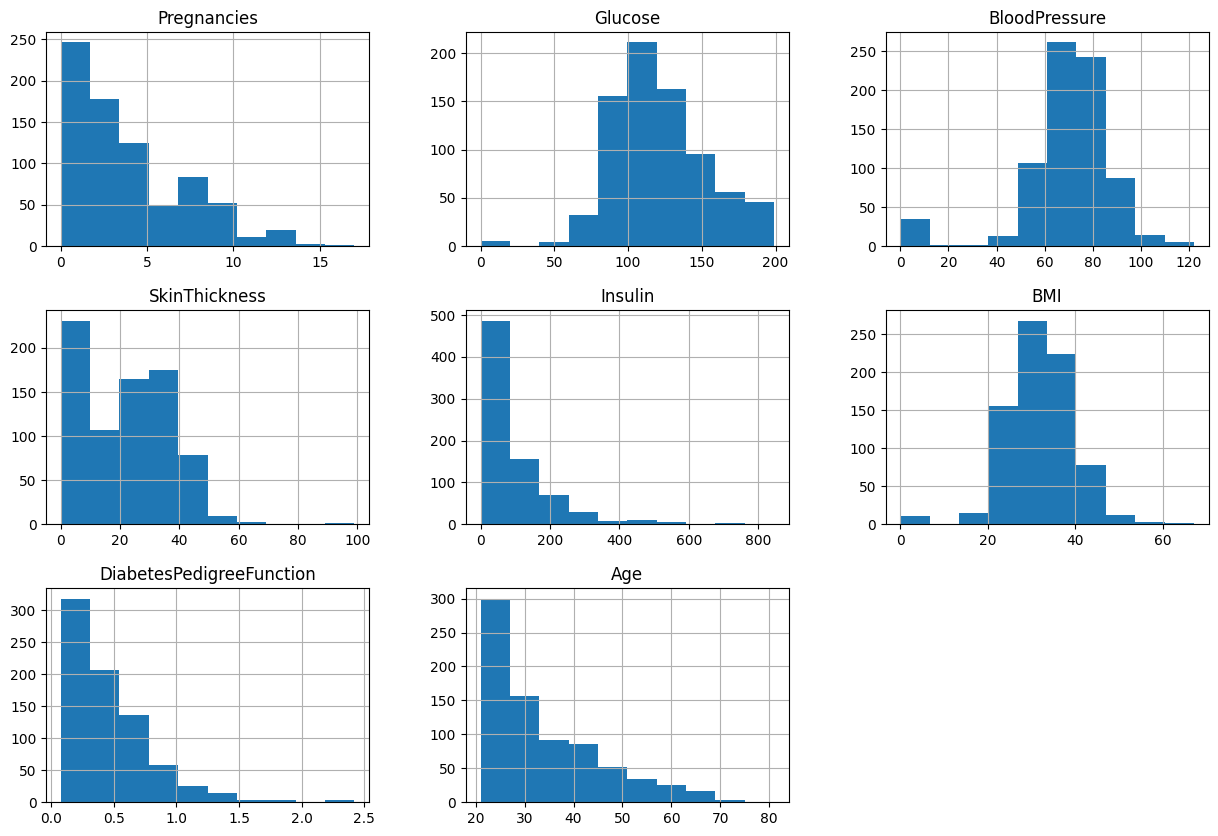

In [ ]:
data1.hist(bins=10,figsize=(15,10))

<Axes: >

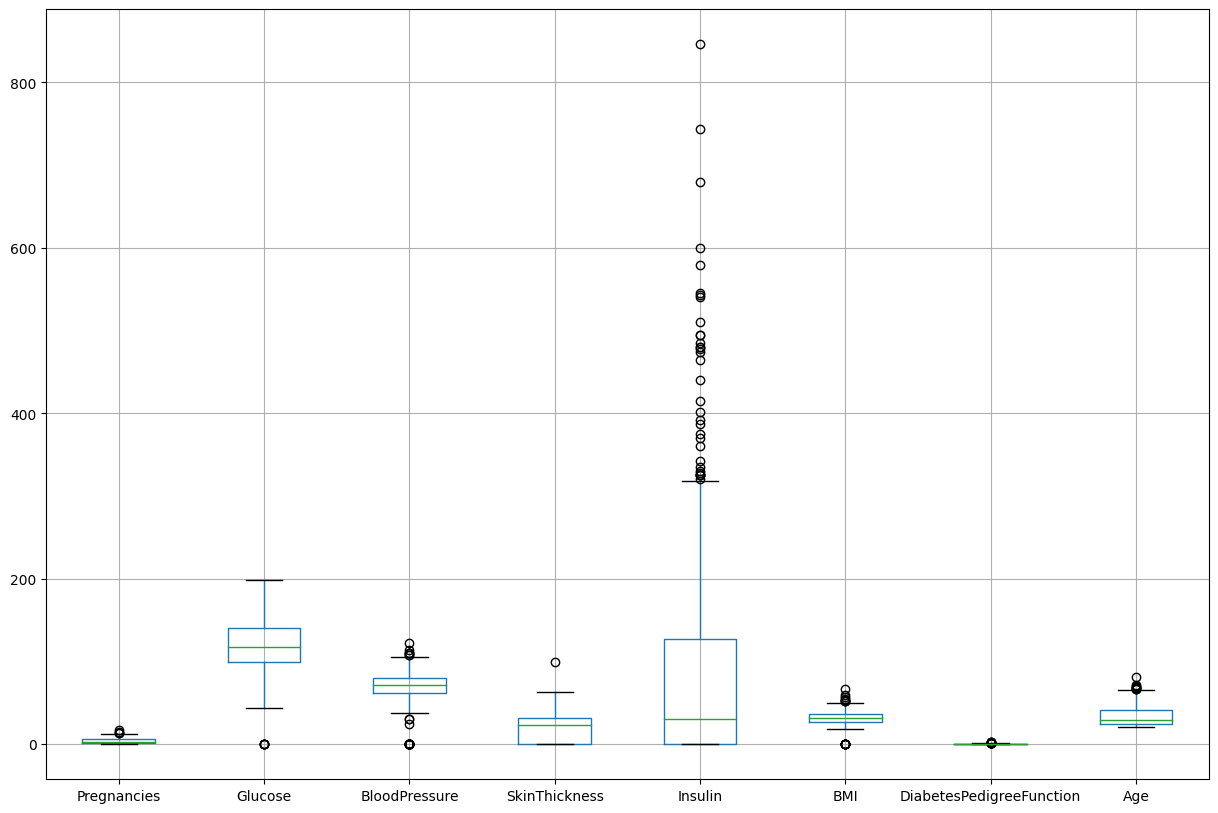

In [ ]:
data1.boxplot(figsize=(15,10))

In [ ]:
corr_matrix = data1.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<Axes: >

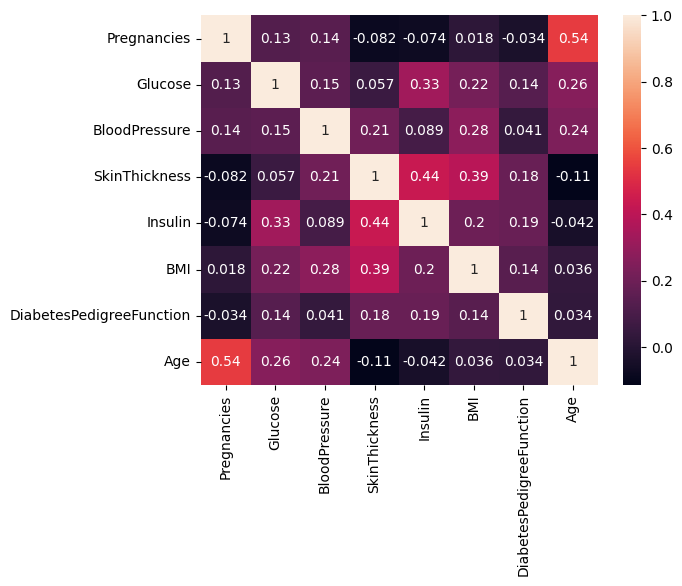

In [ ]:
sns.heatmap(corr_matrix,annot=True)

In [ ]:
X = data.drop(columns = 'Outcome',axis=1)
Y = data['Outcome']

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_res, Y_res = sm.fit_resample(X_scaled, Y)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
log_reg_model = LogisticRegression()
dec_tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
gbc_model = GradientBoostingClassifier()

In [ ]:
log_reg_model.fit(X_train,Y_train)
dec_tree_model.fit(X_train,Y_train)
rf_model.fit(X_train,Y_train)
svm_model.fit(X_train,Y_train)
knn_model.fit(X_train,Y_train)
gbc_model.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = log_reg_model.predict(X_test)
print("Accuracy of logistic regression : " ,accuracy_score(Y_test,y_pred))
y_pred = dec_tree_model.predict(X_test)
print("Accuracy of decision tree : " ,accuracy_score(Y_test,y_pred))
y_pred = rf_model.predict(X_test)
print("Accuracy of random forest : " ,accuracy_score(Y_test,y_pred))
y_pred = svm_model.predict(X_test)
print("Accuracy of svm : " ,accuracy_score(Y_test,y_pred))
y_pred = knn_model.predict(X_test)
print("Accuracy of knn : " ,accuracy_score(Y_test,y_pred))
y_pred = gbc_model.predict(X_test)
print("Accuracy of gradient boost : " ,accuracy_score(Y_test,y_pred))

Accuracy of logistic regression :  0.765
Accuracy of decision tree :  0.76
Accuracy of random forest :  0.8
Accuracy of svm :  0.77
Accuracy of knn :  0.775
Accuracy of gradient boost :  0.805


In [ ]:
print(f"Training Accuracy logistic model = {round(log_reg_model.score(X_train,Y_train)*100,2)}%")
print(f"Testing Accuracy logistic model = {round(log_reg_model.score(X_test,Y_test)*100,2)}%")

Training Accuracy logistic model = 76.5%
Testing Accuracy logistic model = 76.5%


In [ ]:
print(f"Training Accuracy decision tree model = {round(dec_tree_model.score(X_train,Y_train)*100,2)}%")
print(f"Testing Accuracy decision tree model = {round(dec_tree_model.score(X_test,Y_test)*100,2)}%")

Training Accuracy decision tree model = 100.0%
Testing Accuracy decision tree model = 76.0%


In [ ]:
print(f"Training Accuracy random forest model = {round(rf_model.score(X_train,Y_train)*100,2)}%")
print(f"Testing Accuracy random forest model = {round(rf_model.score(X_test,Y_test)*100,2)}%")

Training Accuracy random forest model = 100.0%
Testing Accuracy random forest model = 80.0%


In [ ]:
print(f"Training Accuracy svm model = {round(svm_model.score(X_train,Y_train)*100,2)}%")
print(f"Testing Accuracy svm model = {round(svm_model.score(X_test,Y_test)*100,2)}%")

Training Accuracy svm model = 83.38%
Testing Accuracy svm model = 77.0%


In [ ]:
print(f"Training Accuracy knn model = {round(knn_model.score(X_train,Y_train)*100,2)}%")
print(f"Testing Accuracy knn model = {round(knn_model.score(X_test,Y_test)*100,2)}%")

Training Accuracy knn model = 84.75%
Testing Accuracy knn model = 77.5%


In [ ]:
print(f"Training Accuracy gradient boost model = {round(gbc_model.score(X_train,Y_train)*100,2)}%")
print(f"Testing Accuracy gradient boost model = {round(gbc_model.score(X_test,Y_test)*100,2)}%")

Training Accuracy gradient boost model = 92.0%
Testing Accuracy gradient boost model = 80.5%


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
log = cross_val_score(log_reg_model, X_res, Y_res, cv=StratifiedKFold(n_splits=5)).mean()
dec = cross_val_score(dec_tree_model, X_res, Y_res, cv=StratifiedKFold(n_splits=5)).mean()
rf = cross_val_score(rf_model, X_res, Y_res, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)).mean()
svm = cross_val_score(svm_model, X_res, Y_res, cv=StratifiedKFold(n_splits=5)).mean()
knn = cross_val_score(knn_model, X_res, Y_res, cv=StratifiedKFold(n_splits=5)).mean()
gbc = cross_val_score(gbc_model, X_res, Y_res, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)).mean()

In [ ]:
print(f"Mean Cross Validation Acuuracy-logistic regression = {round(log*100,2)} %")
print(f"Mean Cross Validation Acuuracy-decision tree = {round(dec*100,2)} %")
print(f"Mean Cross Validation Acuuracy-random forest = {round(rf*100,2)} %")
print(f"Mean Cross Validation Acuuracy-svm = {round(svm*100,2)} %")
print(f"Mean Cross Validation Acuuracy-knn = {round(knn*100,2)} %")
print(f"Mean Cross Validation Acuuracy-gbc = {round(gbc*100,2)} %")

Mean Cross Validation Acuuracy-logistic regression = 76.1 %
Mean Cross Validation Acuuracy-decision tree = 75.0 %
Mean Cross Validation Acuuracy-random forest = 82.0 %
Mean Cross Validation Acuuracy-svm = 77.3 %
Mean Cross Validation Acuuracy-knn = 79.1 %
Mean Cross Validation Acuuracy-gbc = 78.1 %


In [ ]:
import warnings
warnings.filterwarnings('ignore')

preg = int(input("Enter 'Pregnancies'=", ))
gcs = float(input("Enter 'Glucose'=", ))
bp = float(input("Enter 'Blood Presure'=", ))
st = float(input("Enter 'Skin Thickness'=", ))
ins = float(input("Enter 'Insulin'=", ))
bmi = float(input("Enter 'BMI'=", ))
dpf = float(input("Enter 'Diabetes Pedigree Function'=", ))
age = float(input("Enter 'Age'=", ))

data3 = [preg,gcs,bp,st,ins,bmi,dpf,age]
input_array = np.array(data3)
input_reshape = input_array.reshape(1,-1)
std_data = scaler.transform(input_reshape)
prediction = rf_model.predict(std_data)
if(prediction[0]==0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

Enter 'Pregnancies'=1
Enter 'Glucose'=86
Enter 'Blood Presure'=100
Enter 'Skin Thickness'=15
Enter 'Insulin'=120
Enter 'BMI'=22.4
Enter 'Diabetes Pedigree Function'=0.567
Enter 'Age'=32
The person is not diabetic


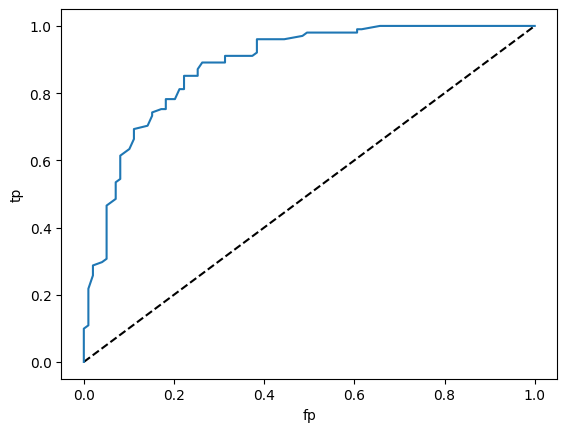

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob=rf_model.predict_proba(X_test)[:,1]
fp,tp,thres = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fp,tp,label='RF')
plt.xlabel('fp')
plt.ylabel('tp')
plt.show()

In [ ]:
roc_auc_score(Y_test,y_pred_prob)

0.8835383538353836